https://www.kaggle.com/competitions/titanic/overview 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [5]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S
572,573,1,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0,0,PC 17474,26.3875,E25,S
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
833,834,0,3,"Augustsson, Mr. Albert",male,23.0,0,0,347468,7.8542,NaN,S
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
320,321,0,3,"Dennis, Mr. Samuel",male,22.0,0,0,A/5 21172,7.2500,NaN,S


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print(train_df.isna().sum())
print("-"*20)
print(test_df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].median())

test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

In [9]:
train_df.drop(columns=["Cabin"], inplace=True)
test_df.drop(columns=["Cabin"], inplace=True)

In [10]:
print(train_df.isna().sum())
print("-"*20)
print(test_df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
--------------------
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [11]:
data_df=[train_df,test_df]

In [12]:
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
label = LabelEncoder()
scaler = MinMaxScaler()

In [14]:
for data in data_df:
    data["family_size"] = data["SibSp"] + data["Parch"] + 1
    data["isAlone"] = data["family_size"].apply(lambda x: True if x == 1 else False)
    data['Age_bin'] = pd.cut(data['Age'], bins=[0, 20, 40, 60, 80], labels=['0-20','20-40','40-60','60-80'])
    data['fare_norm'] = scaler.fit_transform(data[['Fare']])
    drop_column = ['Age','Name','Ticket', 'Fare']
    data.drop(drop_column, axis=1, inplace = True)

In [15]:
train_df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,family_size,isAlone,Age_bin,fare_norm
0,1,0,3,male,1,0,S,2,False,20-40,0.014151
1,2,1,1,female,1,0,C,2,False,20-40,0.139136
2,3,1,3,female,0,0,S,1,True,20-40,0.015469
3,4,1,1,female,1,0,S,2,False,20-40,0.103644
4,5,0,3,male,0,0,S,1,True,20-40,0.015713
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,S,1,True,20-40,0.025374
887,888,1,1,female,0,0,S,1,True,0-20,0.058556
888,889,0,3,female,1,2,S,4,False,20-40,0.045771
889,890,1,1,male,0,0,C,1,True,20-40,0.058556


In [16]:
drop_column = ["PassengerId"]
train_df.drop(drop_column, axis=1, inplace = True)

In [17]:
train_df = pd.get_dummies(train_df, columns = ["Sex","Age_bin","Embarked"],
                         prefix=["Sex","Age_type","Em_type"])
test_df = pd.get_dummies(test_df, columns = ["Sex","Age_bin","Embarked"],
                         prefix=["Sex","Age_type","Em_type"])

In [18]:
train_df

,Survived,Pclass,SibSp,Parch,family_size,isAlone,fare_norm,Sex_female,Sex_male,Age_type_0-20,Age_type_20-40,Age_type_40-60,Age_type_60-80,Em_type_C,Em_type_Q,Em_type_S
0,0,3,1,0,2,False,0.014151,False,True,False,True,False,False,False,False,True
1,1,1,1,0,2,False,0.139136,True,False,False,True,False,False,True,False,False
2,1,3,0,0,1,True,0.015469,True,False,False,True,False,False,False,False,True
3,1,1,1,0,2,False,0.103644,True,False,False,True,False,False,False,False,True
4,0,3,0,0,1,True,0.015713,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,1,True,0.025374,False,True,False,True,False,False,False,False,True
887,1,1,0,0,1,True,0.058556,True,False,True,False,False,False,False,False,True
888,0,3,1,2,4,False,0.045771,True,False,False,True,False,False,False,False,True
889,1,1,0,0,1,True,0.058556,False,True,False,True,False,False,True,False,False


In [19]:
X_train = train_df.drop(columns=["Survived"])
y_train = train_df["Survived"]

X_test = test_df.drop(columns=["PassengerId"])
test_PassengerId = test_df["PassengerId"]

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf_model = RandomForestClassifier(n_estimators=400, n_jobs=-1,random_state=42)

In [22]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)

In [23]:
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [25]:
train_accuracy = balanced_accuracy_score(y_train, y_pred_train)
print(f'Train Accuracy: {train_accuracy:.4f}')

Train Accuracy: 0.9323


In [26]:
X_train

,Pclass,SibSp,Parch,family_size,isAlone,fare_norm,Sex_female,Sex_male,Age_type_0-20,Age_type_20-40,Age_type_40-60,Age_type_60-80,Em_type_C,Em_type_Q,Em_type_S
0,3,1,0,2,False,0.014151,False,True,False,True,False,False,False,False,True
1,1,1,0,2,False,0.139136,True,False,False,True,False,False,True,False,False
2,3,0,0,1,True,0.015469,True,False,False,True,False,False,False,False,True
3,1,1,0,2,False,0.103644,True,False,False,True,False,False,False,False,True
4,3,0,0,1,True,0.015713,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,1,True,0.025374,False,True,False,True,False,False,False,False,True
887,1,0,0,1,True,0.058556,True,False,True,False,False,False,False,False,True
888,3,1,2,4,False,0.045771,True,False,False,True,False,False,False,False,True
889,1,0,0,1,True,0.058556,False,True,False,True,False,False,True,False,False


Important features
____________________________________________________________
93.83


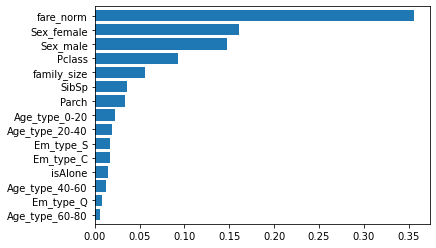

In [27]:
rf_model.score(X_train,y_train)
acc_random_forest = round(rf_model.score(X_train, y_train) * 100, 2)

print("Important features")
pd.Series(rf_model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)

In [28]:
pred_df = pd.DataFrame({'PassengerId': test_PassengerId, 'Survived': y_pred_test})

In [29]:
pred_df.to_csv('predictions_rf.csv', index=False)